### COVID-19 
### UPDATE by DAY in the countries: 
#### 'China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'Australia', 'Luxembourg', 'US', 'United Kingdom', 'Canada', 'Vietnam', 'Philippines', 'Israel'
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

641

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'10-23-2021'

### Number of the infected countries in the first outbreak day

In [4]:
num_infected_countries[0]

7

### Number of the infected countries in the latest outbreak day

In [5]:
num_infected_countries[-1]

195

### Number of the infected countries changed by day

Text(0, 0.5, 'Number of countries in log_values')

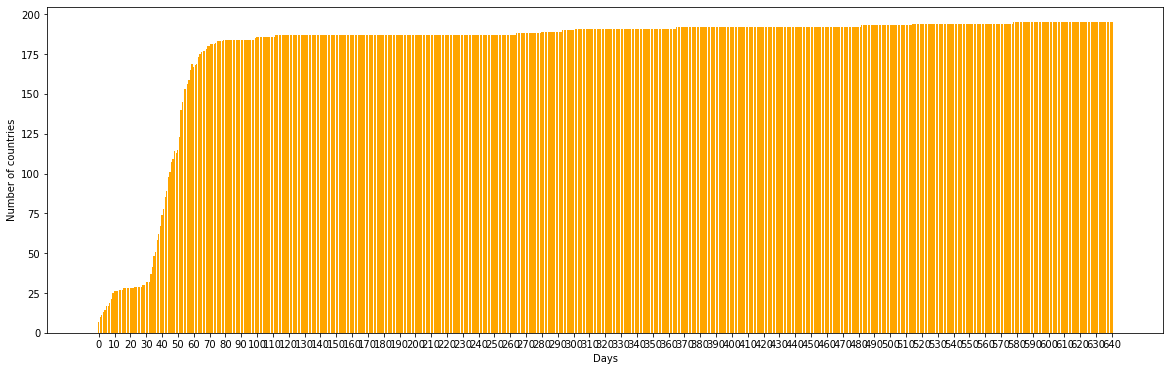

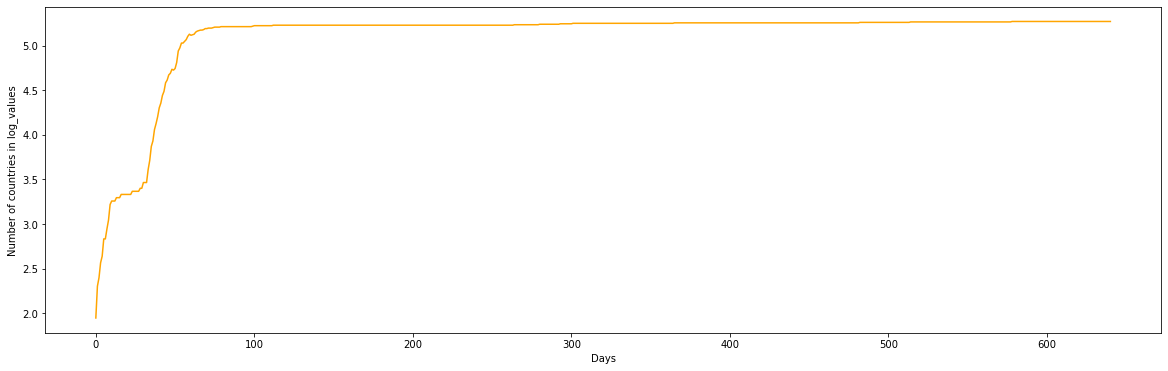

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, num_infected_countries, color='orange')
plt.xlabel('Days')
plt.ylabel('Number of countries')
('Increasing', num_infected_countries[-1]-num_infected_countries[-2])

plt.figure(2)
plt.plot(x_dat, np.log(num_infected_countries), color='orange', label="New Cases by day in log_values")
plt.xlabel('Days')
plt.ylabel('Number of countries in log_values')

### New cases in the World changed by day

Last day Increasing 367027.0


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


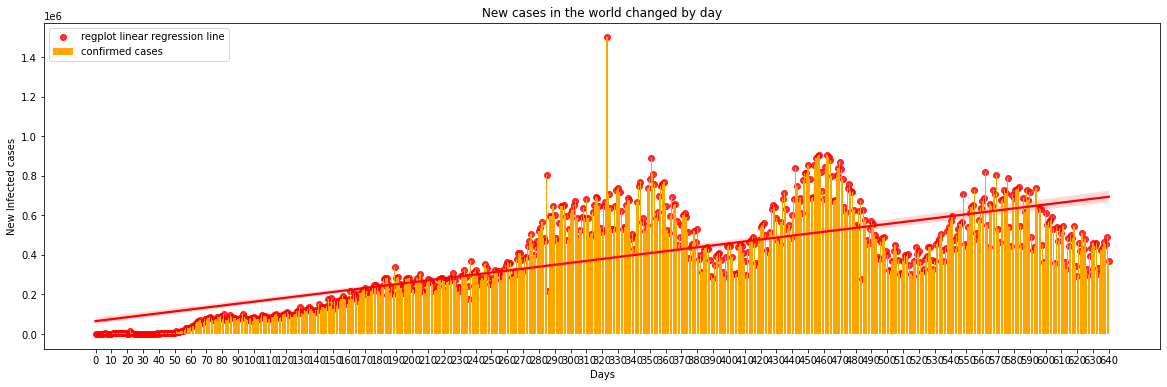

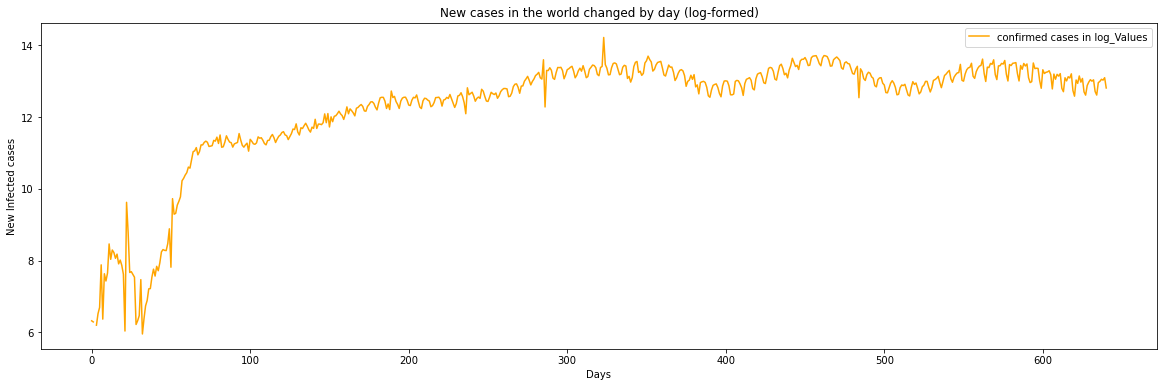

In [7]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, newCasesByDay, color='orange', label='confirmed cases')
plt.xlabel('Days')
plt.ylabel('New Infected cases')
plt.title("New cases in the world changed by day")
plt.legend()
print('Last day Increasing', newCasesByDay[-1])
ax = sns.regplot(x=x_dat, y=newCasesByDay, ci=95, label="regplot linear regression line", color='red')
# ax2 = sns.regplot(x=x_dat, y=newCasesByDay, ci=10, label="regplot linear regression line", color='red')
ax.legend(loc="upper left")

plt.figure(2)
plt.plot(x_dat, np.log(newCasesByDay), color='orange', label='confirmed cases in log_Values')
plt.xlabel('Days')
plt.ylabel('New Infected cases')
plt.title("New cases in the world changed by day (log-formed)")
plt.legend()

### Total CONFIRMED_vs_RECOVERED_vs_FATALITIES cases in the World changed by day

(('Total Confirmed', 243354428.0),
 ('Total Recovered', 0.0),
 ('Total Fatalities', 4943926.0),
 ('Remaining', 238410502.0))

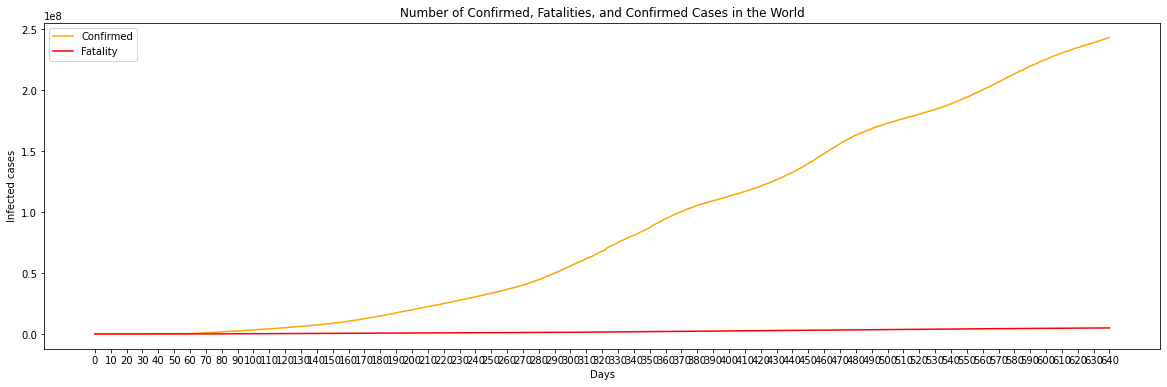

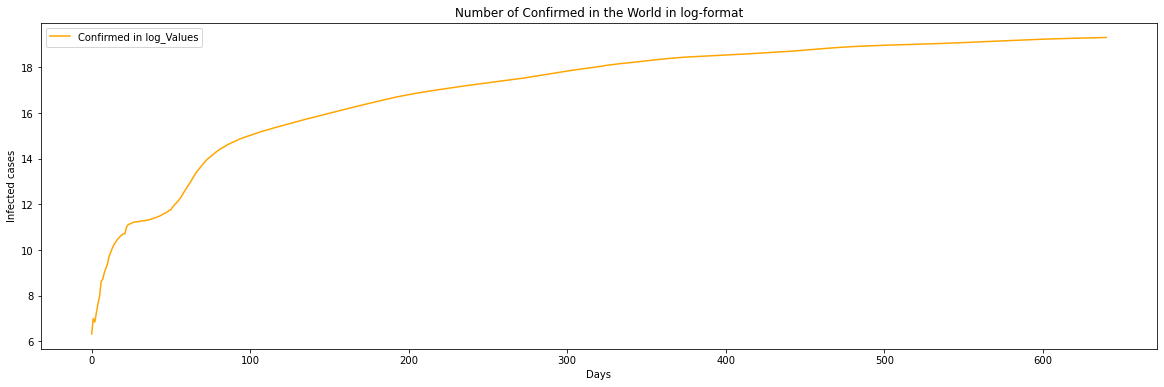

In [8]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, totalconfirmed_by_day, color='orange', label='Confirmed')
# plt.plot(x_dat, totalrecovered_by_day, color='green', label='Recovered')
plt.plot(x_dat, totalfatalities_by_day, color='red', label='Fatality')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.title("Number of Confirmed, Fatalities, and Confirmed Cases in the World")
plt.legend()

plt.figure(2)
plt.plot(x_dat, np.log(totalconfirmed_by_day), color='orange', label='Confirmed in log_Values')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.title("Number of Confirmed in the World in log-format")
plt.legend()

('Total Confirmed', totalconfirmed_by_day[-1]), ('Total Recovered', totalrecovered_by_day[-1]), ('Total Fatalities', totalfatalities_by_day[-1]), ('Remaining', totalconfirmed_by_day[-1]-totalrecovered_by_day[-1]-totalfatalities_by_day[-1])

### Number of infected cases changed by day in the countries
### China, Germany, Italy, South Korea, Japan, US, Australia, Luxembourg, UK, Canada, Vietnam

NUMBER OF INFECTED CASES IN THE FIRST DAY in the following countries: 

China 32
Germany 0
Denmark 0
Korea, South 0
Japan 1
Australia 0
Luxembourg 0
US 1
United Kingdom 0
Canada 0
Vietnam 0
Israel 0
India 0


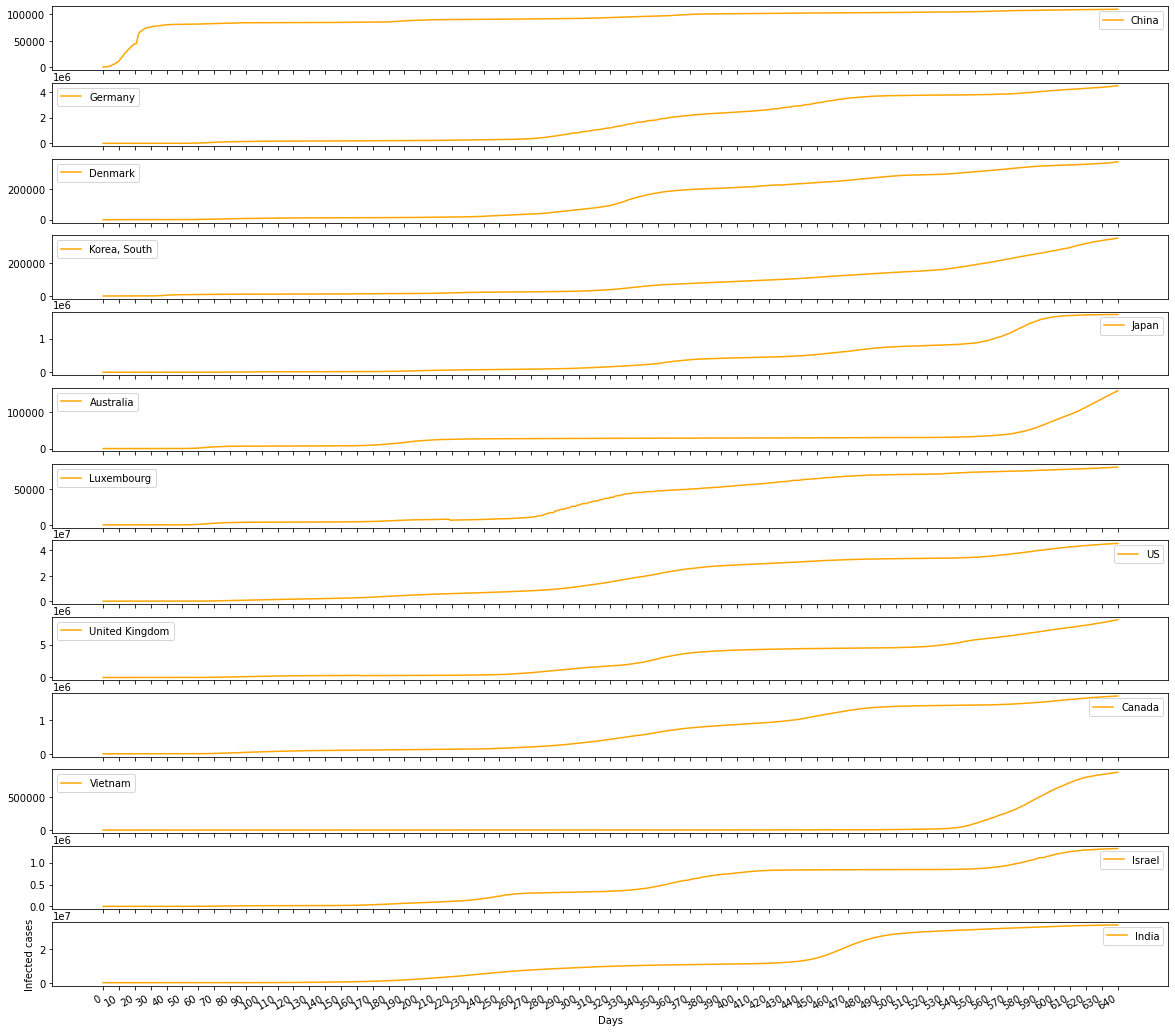

In [9]:
countries = ['China', 'Germany', 'Denmark', 'Korea, South', 'Japan', 'Australia', 'Luxembourg', 'US', 'United Kingdom', 'Canada', 'Vietnam', 'Israel', 'India']

rcParams['figure.figsize'] = 20, 20
countries_confirmed[countries].plot(subplots=True, legend=True, color='orange')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend()

print("NUMBER OF INFECTED CASES IN THE FIRST DAY in the following countries: \n")
for country in countries:
    print(country, StartML.searchByValue(data[0], try_keys=['Country/Region'], value=country).shape[0])

### Number of CONFIRMED_vs_RECOVERED_vs_FATALITY cases changed by day in these countries

In [10]:
rcParams['figure.figsize'] = 20, 6

countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Confirmed', 'Total Fatalities', 'Remaining'])
for country in countries:
    countriesdf[country] = [countries_confirmed[country].iloc[-1]-countries_confirmed[country].iloc[-2], 
                            countries_confirmed[country].iloc[-1], 
                            countries_fatalities[country].iloc[-1], 
                            countries_confirmed[country].iloc[-1]-countries_recovered[country].iloc[-1]-countries_fatalities[country].iloc[-1]]

,China,Germany,Denmark,"Korea, South",Japan,Australia,Luxembourg,US,United Kingdom,Canada,Vietnam,Israel,India
Last day Increasing,50.0,13863.0,1351.0,1423.0,285.0,2203.0,0.0,26998.0,45102.0,1118.0,3373.0,501.0,15906.0
Total Confirmed,109155.0,4476187.0,377333.0,351899.0,1717462.0,158604.0,80603.0,45427464.0,8775889.0,1705137.0,884895.0,1322395.0,34175468.0
Total Fatalities,4849.0,95105.0,2699.0,2766.0,18199.0,1637.0,842.0,735800.0,139878.0,28797.0,21620.0,8046.0,454269.0
Remaining,104306.0,4381082.0,374634.0,349133.0,1699263.0,156967.0,79761.0,44691664.0,8636011.0,1676340.0,863275.0,1314349.0,33721199.0


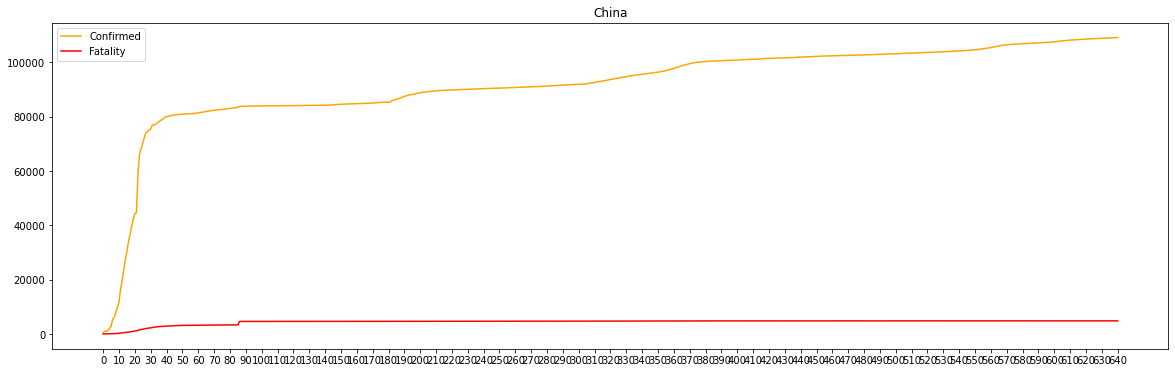

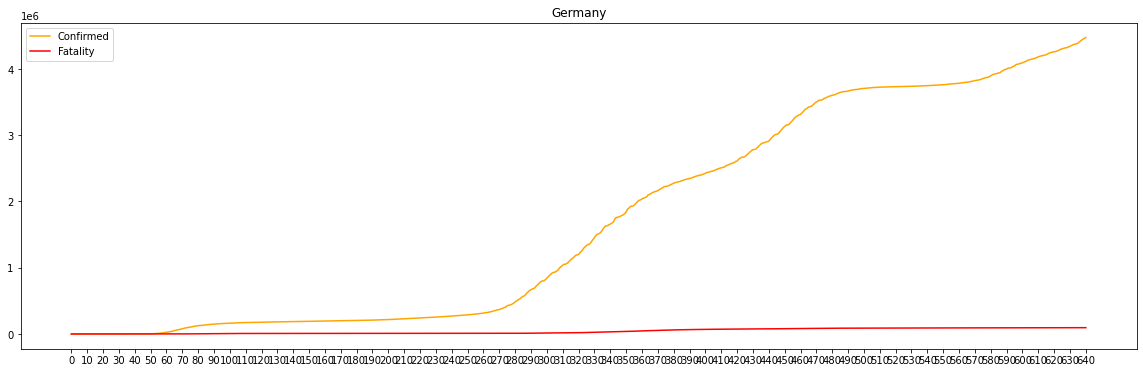

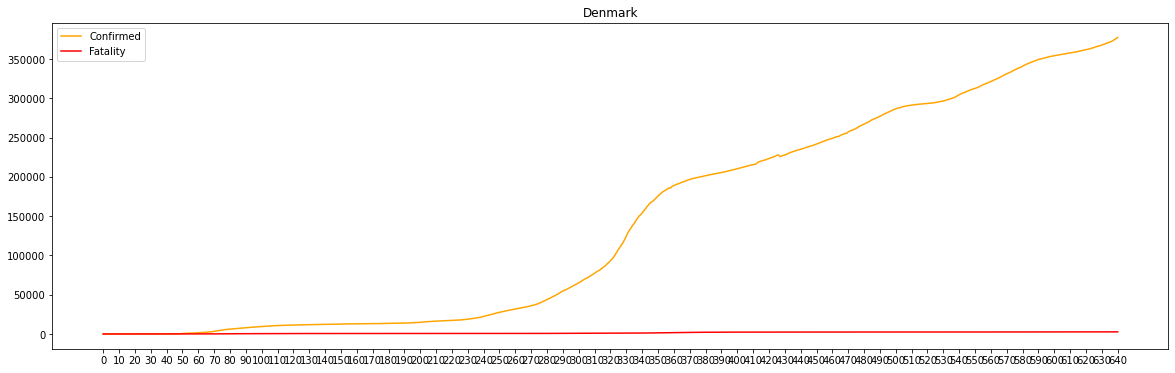

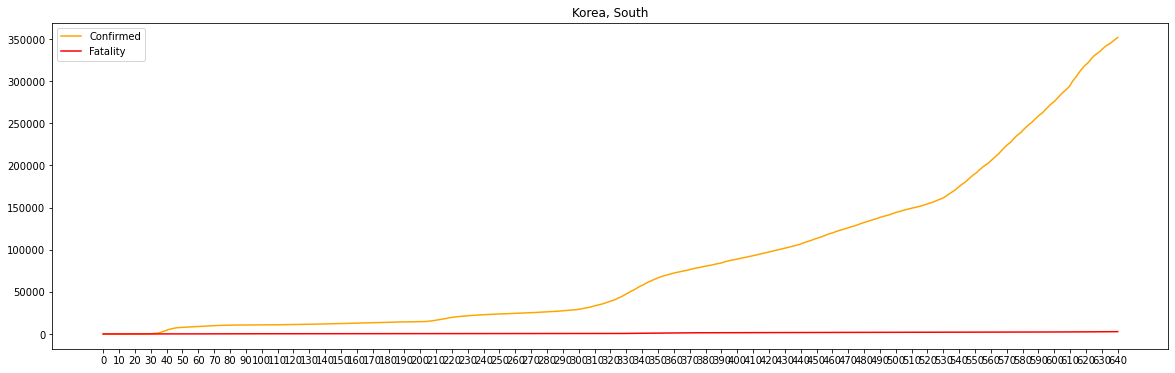

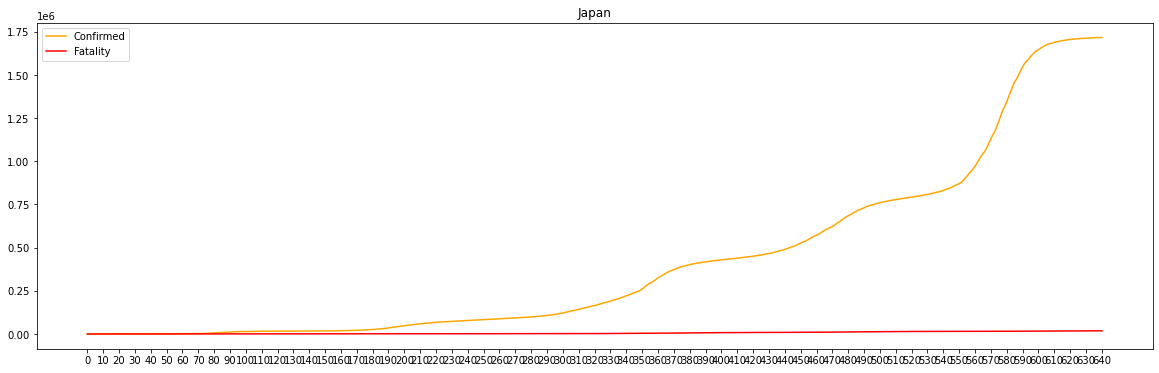

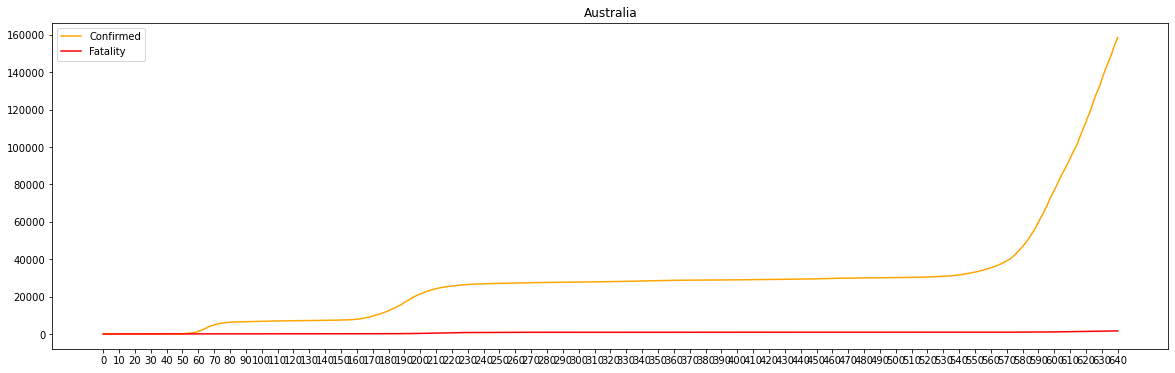

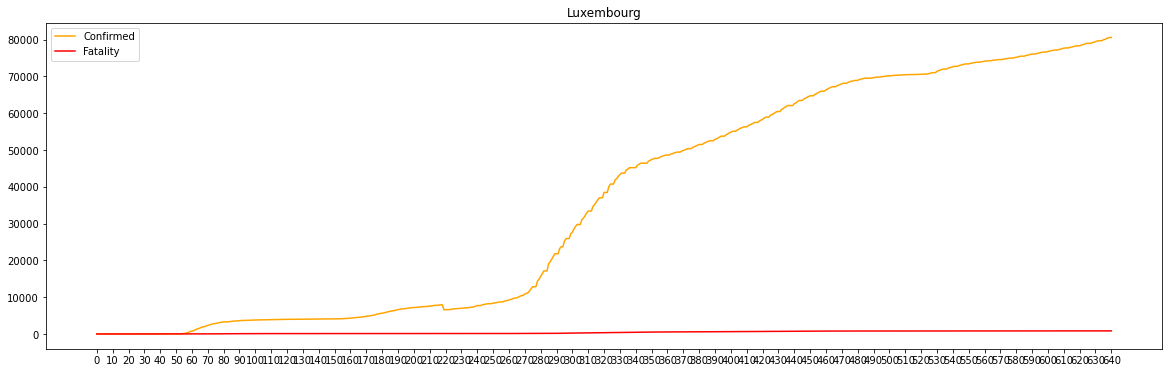

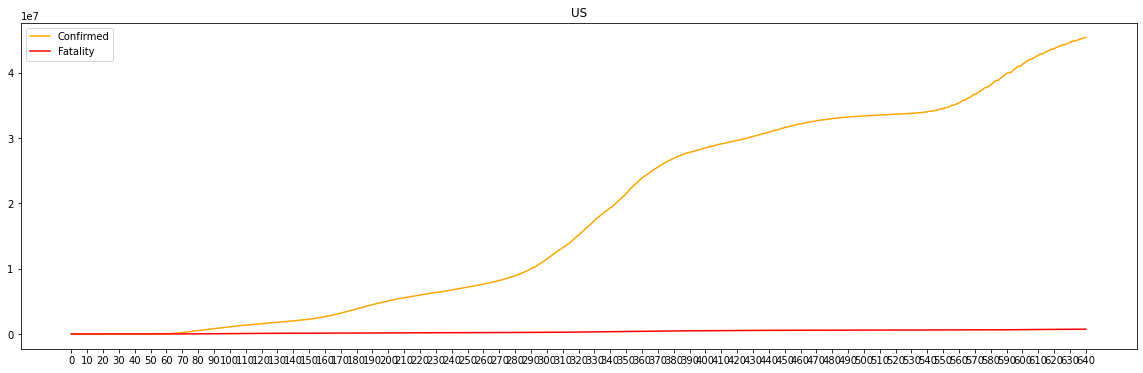

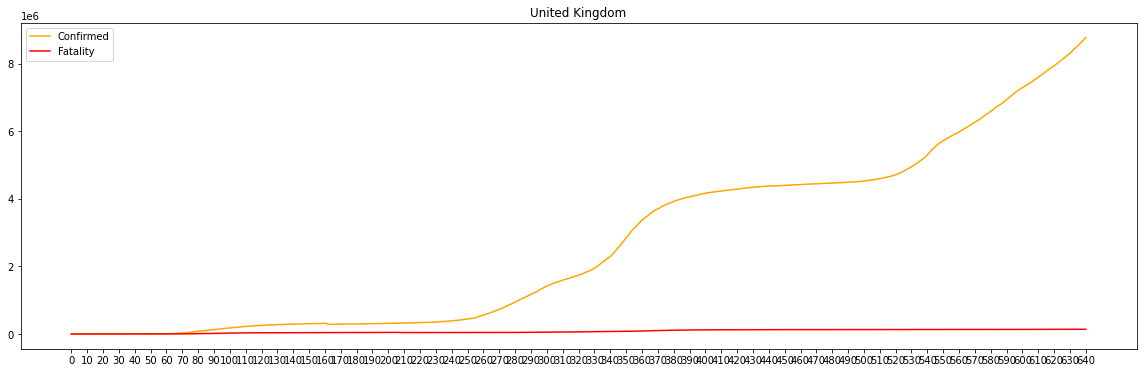

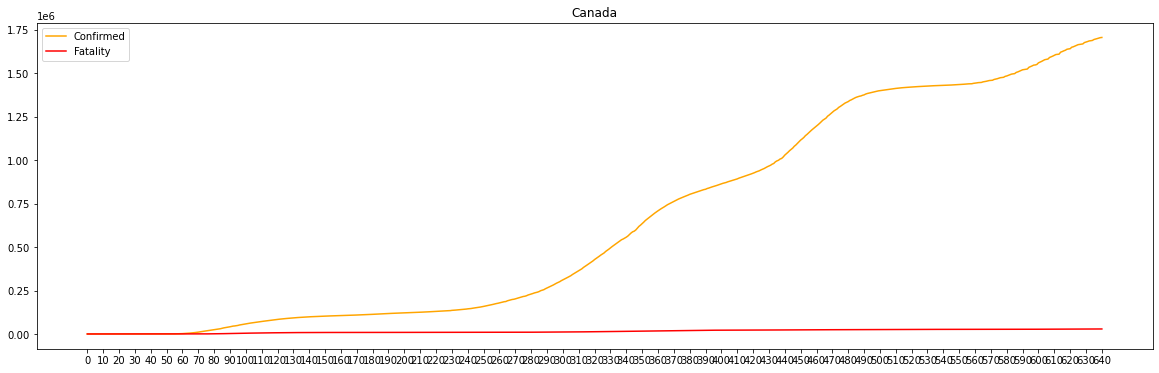

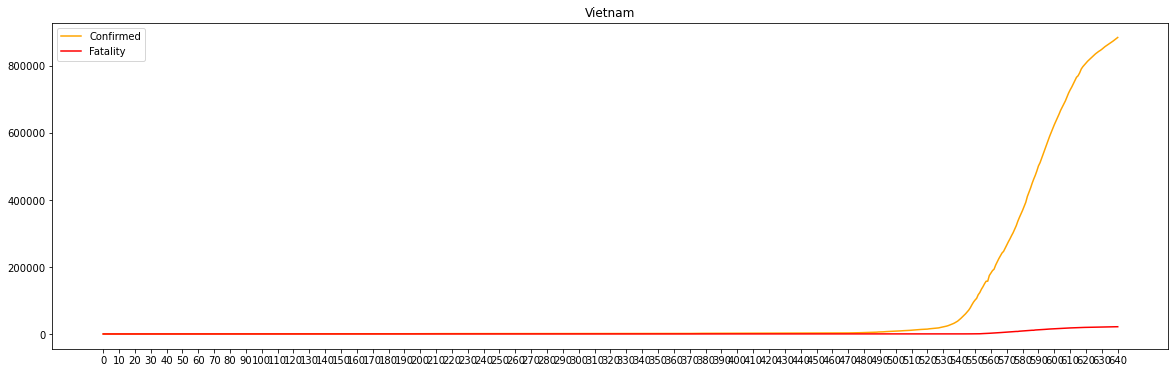

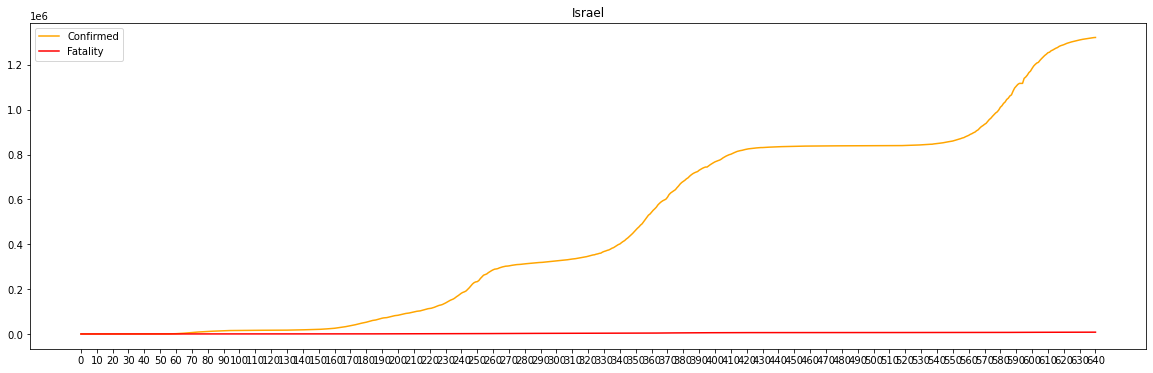

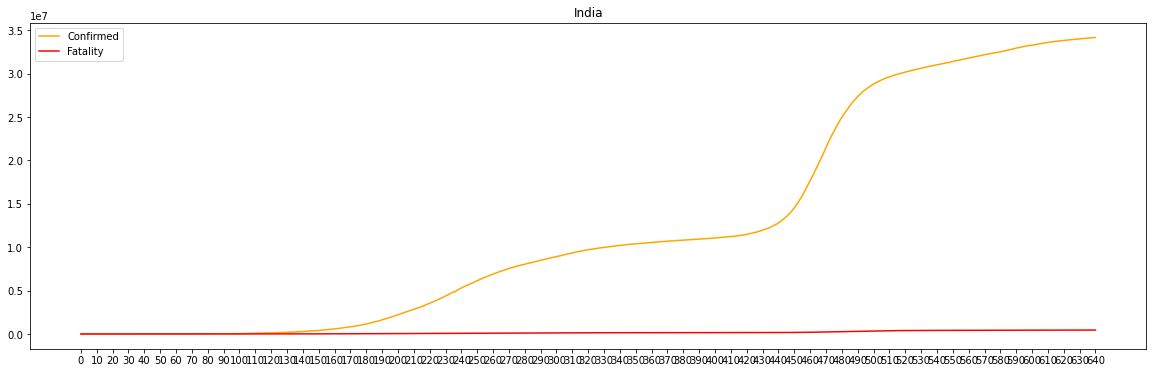

In [11]:
figure = 1
plt.xticks(rotation=45)
for country in countries:
    plt.figure(figure)
    plt.xticks(np.arange(0, max(x_dat)+1, 10), rotation=45)
    countries_confirmed[country].plot(color='orange', label='Confirmed')
    # countries_recovered[country].plot(color='green', label='Recovered')
    countries_fatalities[country].plot(color='red', label='Fatality')
    plt.title(country)
    plt.legend()    
    figure = figure+1
    
countriesdf

,China,Germany,Denmark,"Korea, South",Japan,Australia,Luxembourg,US,United Kingdom,Canada,Vietnam,Israel,India
Last day Increasing,50.0,13863.0,1351.0,1423.0,285.0,2203.0,0.0,26998.0,45102.0,1118.0,3373.0,501.0,15906.0
Total Confirmed until yesterday,109155.0,4476187.0,377333.0,351899.0,1717462.0,158604.0,80603.0,45427464.0,8775889.0,1705137.0,884895.0,1322395.0,34175468.0
Highest Number,15133.0,49044.0,4508.0,3270.0,25892.0,2744.0,1967.0,303008.0,68192.0,11381.0,17428.0,22291.0,414188.0


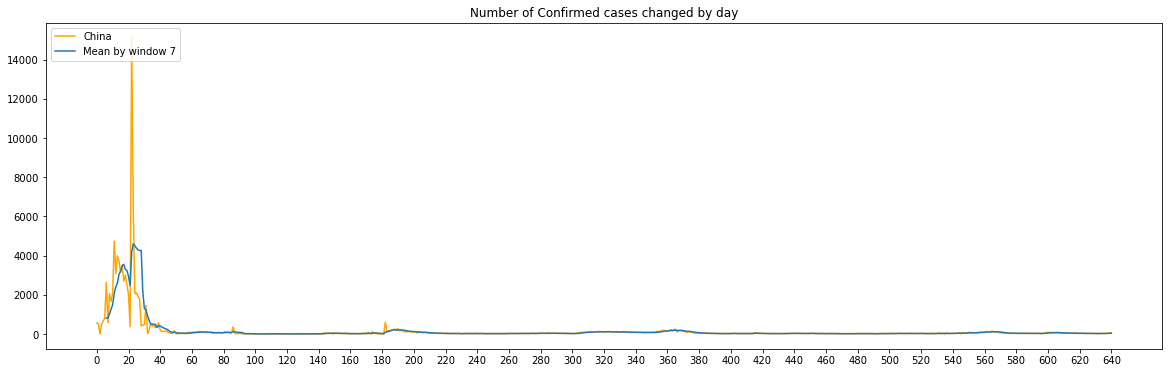

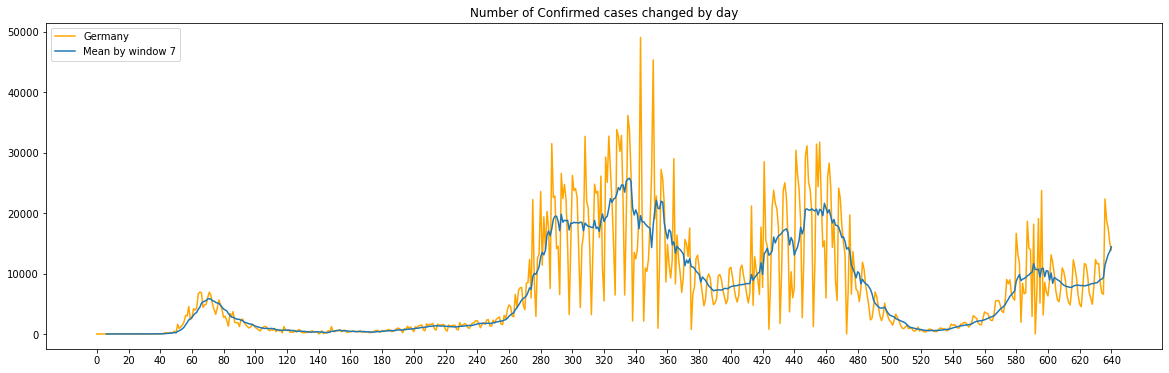

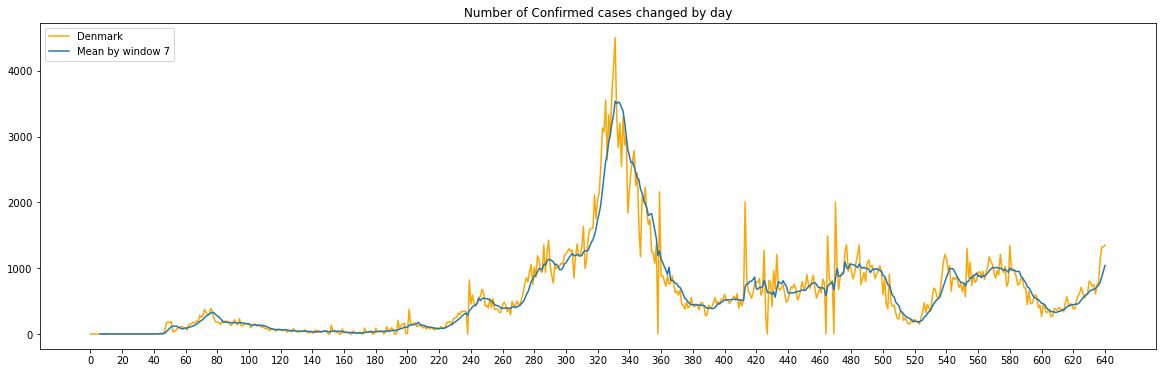

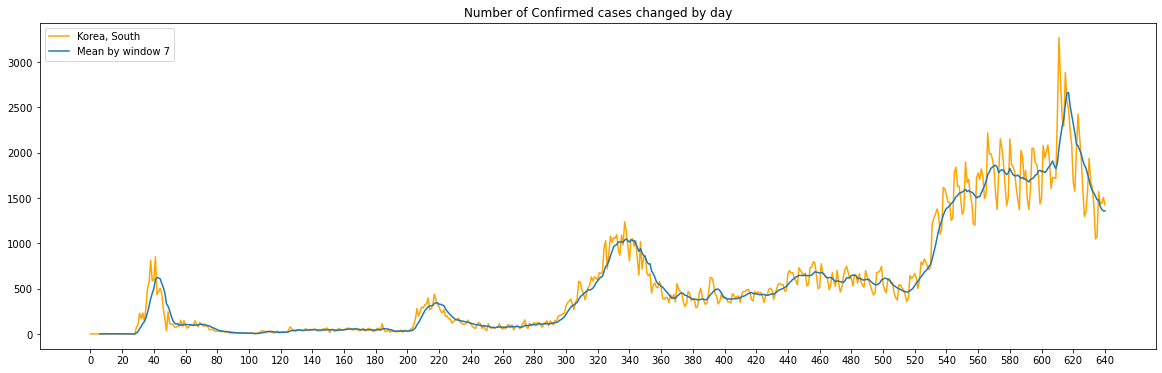

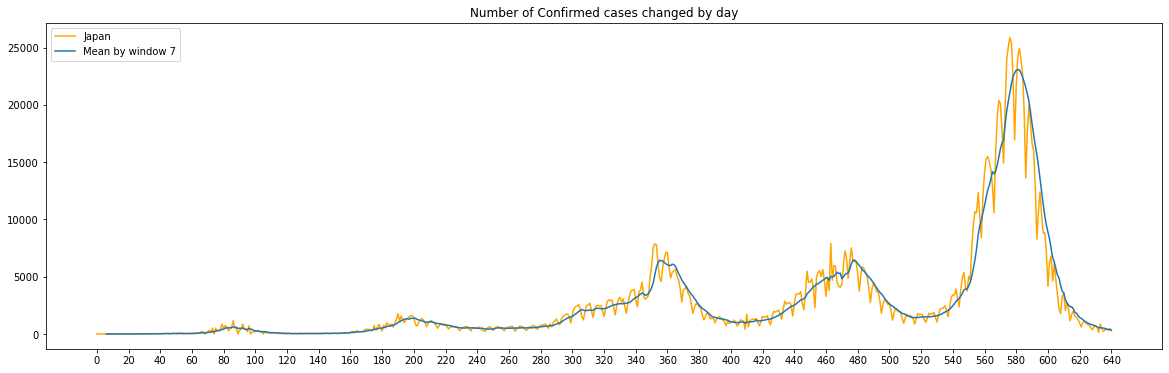

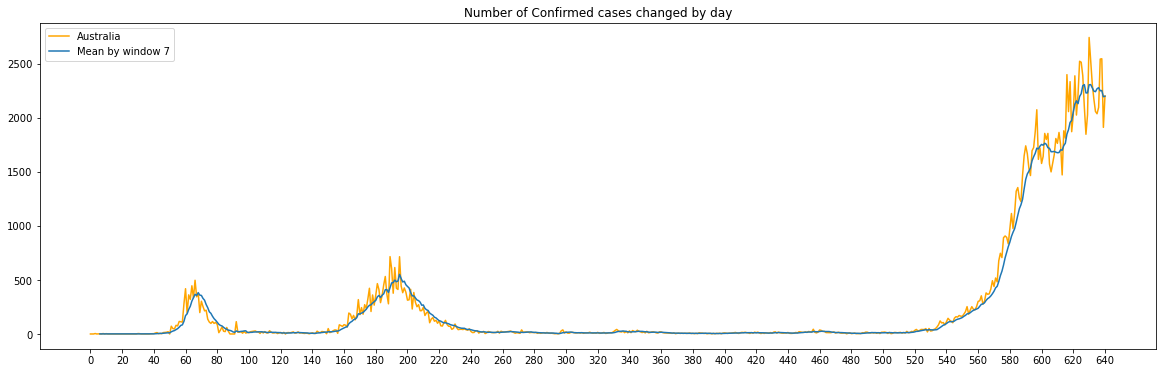

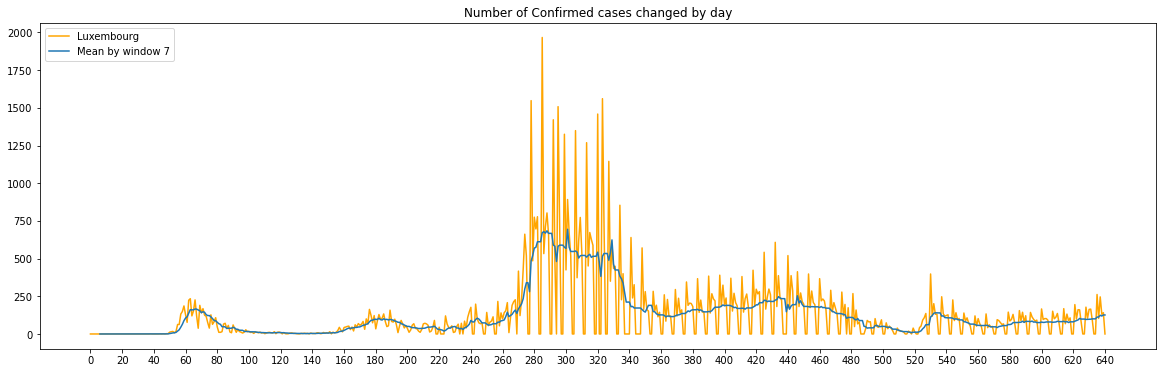

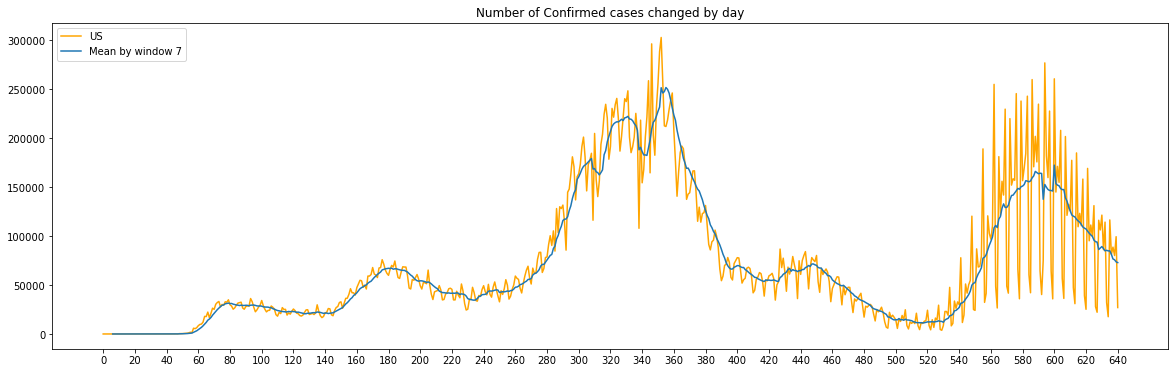

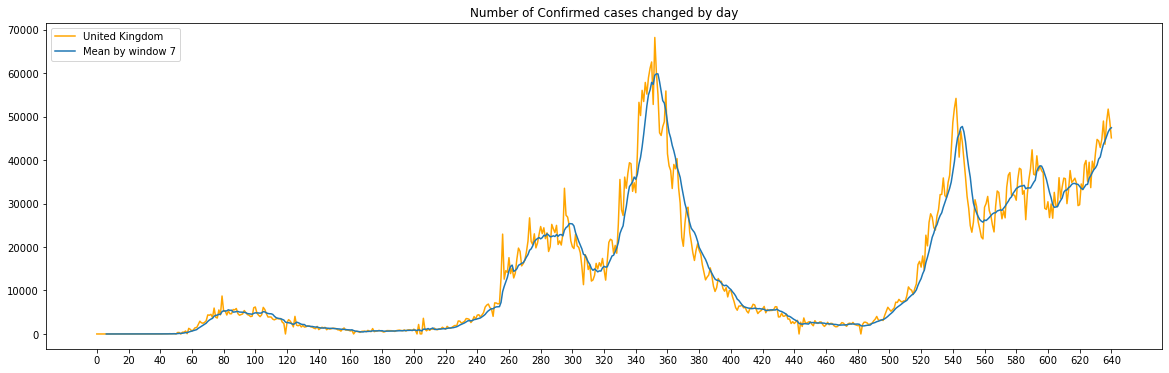

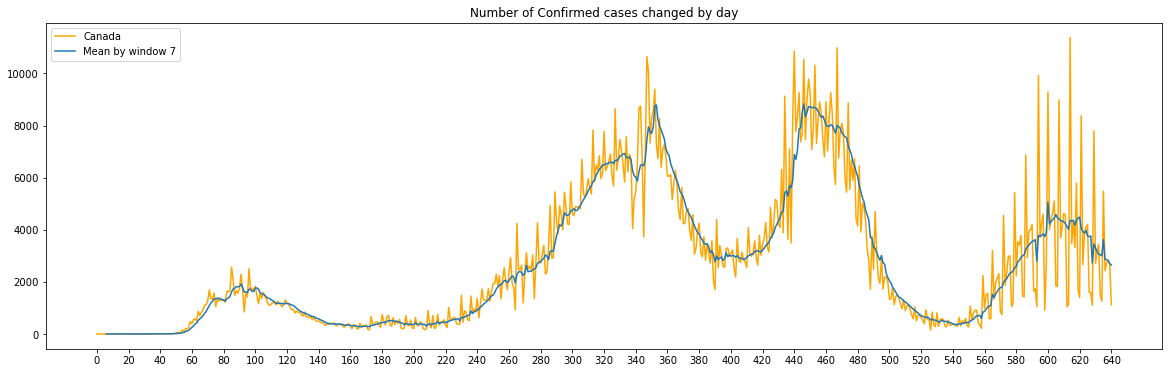

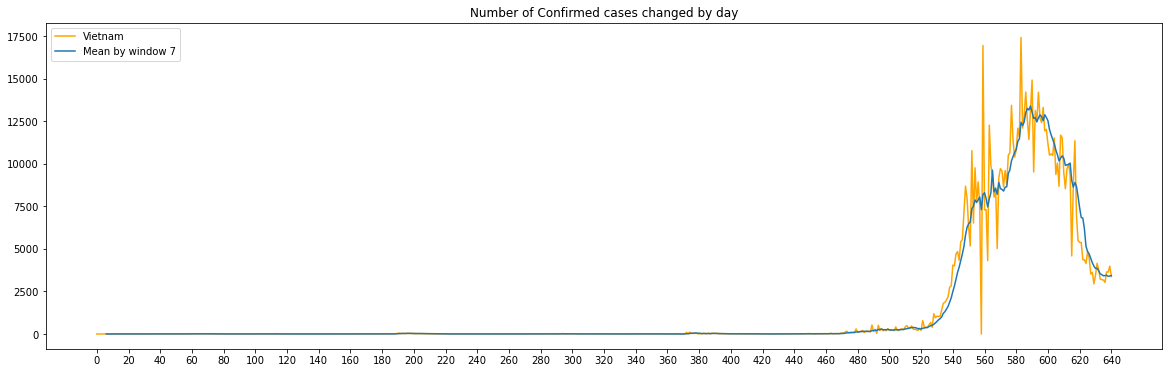

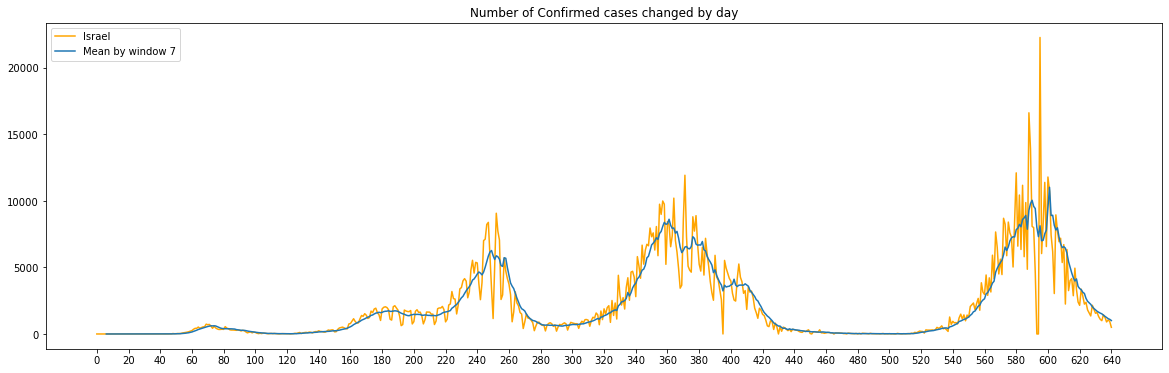

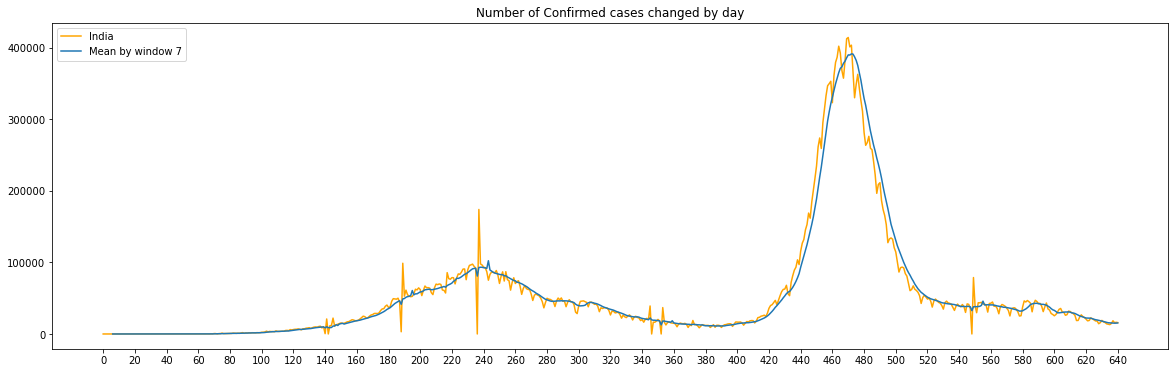

In [12]:
# time slot 7 days
window_slot = 7

countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Confirmed until yesterday', 'Highest Number'])

for country in countries:
    countriesdf[country] = [countries_confirmed_by_day[country].iloc[-1], countries_confirmed[country].iloc[-1], 
                            countries_confirmed_by_day[country].max()]

# Mitigate the negative values by converting all negative values to 0
countriesdf.mask(countriesdf<0, 0, inplace=True) 

figure = 1
rcParams['figure.figsize'] = 20, 6

for country in countries:    
    plt.figure(figure)
    plt.xticks(np.arange(0, max(x_dat)+1, 20), rotation=45)
    
    # Mitigate the negative values by converting all negative values to 0
    countries_confirmed_by_day[country].mask(countries_confirmed_by_day[country]<0, 0, inplace=True)
    
    countries_confirmed_by_day[country].plot(color='orange', label=country)    
    
    # check sum cases by time slot 
    roll = countries_confirmed_by_day[country].rolling(window = window_slot)
    roll.mean().plot(label='Mean by window '+str(window_slot))

    plt.title("Number of Confirmed cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

### By observing the above information and the charts, there are some highlights
#### - Day 0 (22.01.2020): there were only 8 countries involved, and after 38 days, this number is increasing up to 63 countries (stand: 29.02.2020)
#### - Day 20 (10.02.2020): there was an increasing change in China,
#### - Day 24-25 (15.02.2020): there were increasing changes in Japan, 5 days later (day 30) (20.02.2020) the similar increasing changes in South Korea and in Italy, and 5 days later (day 35) (25.02.2020) in Germany.
